##  Regresja liniowa

Regresja liniowa to tworzenie modeli przedstawiających wielkość, której wartość chcemy przewidzieć (zmienna zależna) jako kombinację liniową predyktorów (zmiennych zależnych).

Struktura modelu ma postać

$$\tilde{y} = \beta_0 + \beta_1 x_1 + \beta_2 x_2 +\ldots+ \beta_n x_n$$

lub w formie macierzowej 

$$\tilde{\mathbf{y}} = \mathbf{[1\  X ]} \beta$$

gdzie wektor wartości zmiennych zależnych jest przewidywany na podstawie macierzy danych i wektora współczynników $\beta$.

Współczynnik $\beta_0$ w nomentkalturze anglojęzycznej jest nazywany *intercept* ponieważ jest to punkt przecięcia się z osią $y$ gdy wszystkie predyktory są równe 0.

Aby wyznaczyć parametry modelu liniowego potrzebujemy wektora danych uczących, tj. znanych nam wartości zmiennej zależnej  $\mathbf{y}$ oraz odpowiadająxcej mu macierzy predyktorów $\mathbf{X}$. Macierz predyktorów nosi nazwę *design matrix*, i bardzo użytyeczne do jej wyznaczenia (w oparciu o dane w forme dataframe) jest pakiet [patsy](https://patsy.readthedocs.io/en/latest/quickstart.html), a w szczególności funkcja ```dmatrices```.


Model regresyjny ma mocne umocowanie statystyczne, jednak w ramach zajęć będziemy traktować go machinistycznie jak jedną z metod uczenia maszynowego. Do tworzenia takich modeli służy klasa ```LinearRegression```

Do analizy regresji liniowej wykorzystywać będziemy pakiet ```scikit-learn``` oraz zawarte w nim klasy, głównie w modułach ```linear_model```, ```metrics``` oraz ```model_selection```. 

### Dane uczące i dane testowe

Zazwyczaj rozwiązując problem nie mamy dostępu do dodatkowych danych testowych uzupełniających nasze dane uczące. Dlatego też, popularną praktyką jest podzielenie posiadanego zbioru danych w sposób losowy na dwa zbiory: uczący i testowy. Do tego służy funkcja ```train_test_split``` z modułu ```model_selection```. 



In [1892]:
import pandas as pd
import patsy as pt
from math import sqrt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, classification_report
import matplotlib.pyplot as plt

### Zadanie 1
Na podstawie danych zawartych w pliku SCORES.csv wykonaj i oceń regresję liniową, gdzie Twoją daną niezależną (predyktorem) będą godziny poświęcone na przygotowanie, a wynikową uzyskane punkty. Wykonanie zadania powinno składać się z następujących kroków:
1. Zaimportowanie niezbędnych bibliotek w szczególności tych tworzących modele liniowe z "scikit-learn", a także biblioteki do operacji na danych oraz tworzenia wykresów.
2. Odczytaj dane z pliku SCORES.csv. Pomocne w interpretacji danych są metody: head(), describe(), shape.
3. Wykonaj wstępny wykres uzyskanych danych (typu "scatter")
4. Dokonaj podziału danych na zbiory danych niezależnych (wejściowe, X) oraz zaleznych (wyjściowe, y) dla swojego modelu, a następnie podziel zbiór na dane testowe i treningowe (30%)
5. Utwróz model regresji liniowej za pomocą sklearn.
6. Wypisz i przeanalizuj wyliczone wskaźniki dla modelu: coef_ oraz intercept_. Czym one są i do czego służą?
7. Wykorzystając stworozny model dokonaj predykcji dla części testowej X. Porównaj wynik (y_pred) z posiadanymi danymi (y_test).
8. Wykonaj wykres konfrontujący dane testowe (X_test, y_test; typu "scatter") oraz predykcje (X_test, y_pred; linia prosta)
9. Dokonaj walidacji uzyskanych predykcji wykorzystując metryki: średni błąd bezwzględny (Mean Absolute Error), błąd średniokwadratowy (Mean Squared Error) oraz pierwiastek błędu średniokwadratowego (Root Mean Squared Error).

Następnie utworzony skrypt wykorzystaj na danych zawartych w SBP.csv, gdzie predyktorem będzie wiek, a wynikiem ciśnienie (SBP). Czy uzyskane wyniki z modelu są równie zadowalające?

In [1893]:
df=pd.read_csv("/home/dembrovskyi/ABD/laboratorium-7-worker2396/SCORES.csv")
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [1894]:
print('Shape: ', df.shape)
df.info()

Shape:  (25, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [1895]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


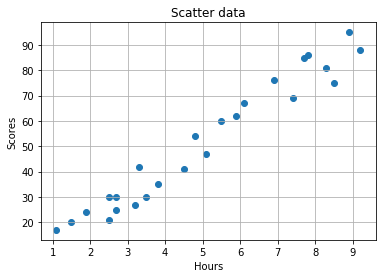

In [1896]:
h = df.Hours
s = df.Scores
plt.scatter(h, s)
plt.title('Scatter data')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.grid(True)
plt.show()

In [1897]:
x_train, x_test, y_train, y_test = train_test_split(h,s, test_size = 0.3)

In [1898]:
model = LinearRegression()
model.fit(x_train.values.reshape(-1,1), y_train.values)

LinearRegression()

coef_ służy do oszacowania współczynników regresji liniowej.

In [1899]:
print(model.coef_)

[9.73589792]


Za pomocą intercept_ możemy obliczyć punkt przecięcia, czyli oczekiwaną średnią wartość Y gdy X=0

In [1900]:
model.intercept_

2.966226756520655

In [1901]:
predict = model.predict(x_test.values.reshape(-1,1))

/home/dembrovskyi/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:2064: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/home/dembrovskyi/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:248: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


[]

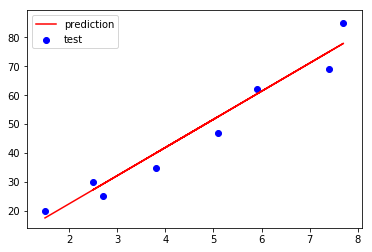

In [1902]:
plt.plot(x_test, predict, label = 'prediction', color = 'r')
plt.scatter(x_test, y_test, label = 'test', color = 'b')
plt.legend()
plt.plot()

In [1903]:
abs_err = mean_absolute_error(y_test, predict)
print('mean absolute error: ', abs_err)

mean absolute error:  4.32878213528017


In [1904]:
mean_sq_err = mean_squared_error(y_test, predict)
print('mean squared error: ', mean_sq_err)

mean squared error:  22.01007024857939


In [1905]:
print('root mean squared error: ', sqrt(mean_sq_err))

root mean squared error:  4.6914891291123535


Część zadania z SBP.csv

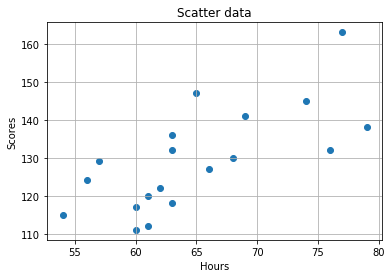

In [1906]:
df=pd.read_csv("/home/dembrovskyi/ABD/laboratorium-7-worker2396/SBP.csv")
x = df.Age
y = df.SBP
plt.scatter(x, y)
plt.title('Scatter data')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.grid(True)
plt.show()

In [1907]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3)
model = LinearRegression()
model.fit(x_train.values.reshape(-1,1), y_train.values)

LinearRegression()

In [1908]:
print('coef_: ', model.coef_)
print('intercept_: ', model.intercept_)

coef_:  [2.15833637]
intercept_:  -9.882889456402808


/home/dembrovskyi/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:2064: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/home/dembrovskyi/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:248: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


[]

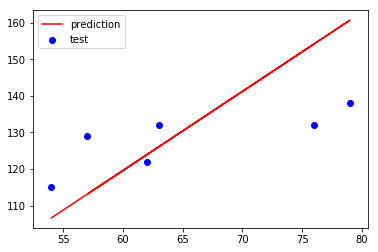

In [1909]:
predict = model.predict(x_test.values.reshape(-1,1))
plt.plot(x_test, predict, label = 'prediction', color = 'r')
plt.scatter(x_test, y_test, label = 'test', color = 'b')
plt.legend()
plt.plot()

In [1910]:
abs_err = mean_absolute_error(y_test, predict)
print('mean absolute error: ', abs_err)
mean_sq_err = mean_squared_error(y_test, predict)
print('mean squared error: ', mean_sq_err)
print('root mean squared error: ', sqrt(mean_sq_err))

mean absolute error:  12.80141067736836
mean squared error:  227.01942829224575
root mean squared error:  15.067163910047762


Dane nie zachowują liniowości. Zestaw nie da się zaproksymować regresją liniową.

### Zadanie 2
Na podstawie danych zawartych w pliku PETROL.csv wykonaj i oceń regresję liniową. Jako daną zależną wykorzystaj zużycie paliwa, a pozostałe - jako predyktory. Wykonanie zadania powinno składać się z kroków podobnych do tych z zadania poprzedniego.

Czy uzyskane wyniki predykcji modelu są dobre? Co mogło mieć pozytywny/negatywny wpływ na taki wynik?

In [1911]:
df=pd.read_csv("/home/dembrovskyi/ABD/laboratorium-7-worker2396/PETROL.csv")

In [1912]:
print('Shape: ', df.shape)
df.info()

Shape:  (48, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 5 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Podatek_paliwowy                 48 non-null     float64
 1   Sredni_przychod                  48 non-null     int64  
 2   Utwardzone_autostrady            48 non-null     int64  
 3   Procent_ludnosci_z_prawem_jazdy  48 non-null     float64
 4   Zuzycie_paliwa                   48 non-null     int64  
dtypes: float64(2), int64(3)
memory usage: 2.0 KB


In [1913]:
df.describe()

,Podatek_paliwowy,Sredni_przychod,Utwardzone_autostrady,Procent_ludnosci_z_prawem_jazdy,Zuzycie_paliwa
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


In [1914]:
df.head()

,Podatek_paliwowy,Sredni_przychod,Utwardzone_autostrady,Procent_ludnosci_z_prawem_jazdy,Zuzycie_paliwa
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [1915]:
x = df.drop(columns=['Zuzycie_paliwa'],axis=1).values
y = df['Zuzycie_paliwa'].values

Zakładając, że istnieje zależność liniowa pomiędzy zużyciem paliwa a procentem ludności z prawem jazdy, badana jest następująca relacja.

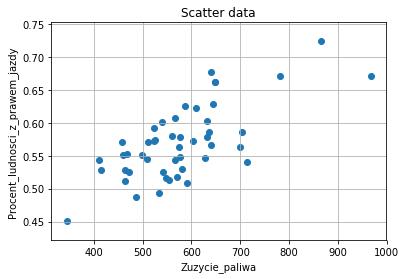

In [1916]:
h = df.Zuzycie_paliwa
s = df.Procent_ludnosci_z_prawem_jazdy
plt.scatter(h, s)
plt.title('Scatter data')
plt.xlabel('Zuzycie_paliwa')
plt.ylabel('Procent_ludnosci_z_prawem_jazdy')
plt.grid(True)
plt.show()

In [1917]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3)

In [1918]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [1919]:
print(model.coef_)

[-1.93214236e+01 -1.07755753e-01 -1.68559556e-03  1.74436046e+03]


In [1920]:
model.intercept_

195.75792833219361

In [1921]:
predict = model.predict(x_test)
print ('Predicted : ', predict)

Predicted :  [420.69538117 734.55970389 381.42536283 642.88044066 790.82600877
 553.32988839 631.13014838 449.8580784  234.73560643 686.21312048
 593.86228104 708.37418692 470.30603412 390.36864208 515.37457857]


In [1922]:
abs_err = mean_absolute_error(y_test, predict)
print('mean absolute error: ', abs_err)
mean_sq_err = mean_squared_error(y_test, predict)
print('mean squared error: ', mean_sq_err)
print('root mean squared error: ', sqrt(mean_sq_err))
print('r2_score:', r2_score(y_test,predict))

mean absolute error:  69.77483448447613
mean squared error:  7234.560067573072
root mean squared error:  85.05621710123883
r2_score: 0.4860348271305047


Text(0.5,1,'Actual vs Predicted')

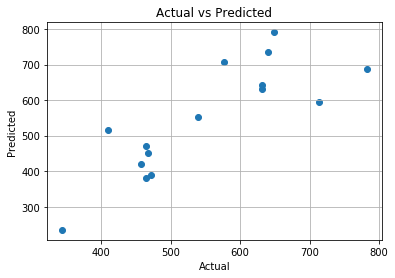

In [1923]:
plt.scatter(y_test,predict)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid()
plt.title('Actual vs Predicted')

In [1924]:
pred_y_df = pd.DataFrame({'Actual Value':y_test,'Predicted value':predict, 'Difference': y_test - predict})
pred_y_df

,Actual Value,Predicted value,Difference
0,457,420.695381,36.304619
1,640,734.559704,-94.559704
2,464,381.425363,82.574637
3,632,642.880441,-10.880441
4,648,790.826009,-142.826009
5,540,553.329888,-13.329888
6,631,631.130148,-0.130148
7,467,449.858078,17.141922
8,344,234.735606,109.264394
9,782,686.213120,95.786880


Widać, że wyniki predykcji są rozproszone i dość rożniące się odnośnie wartości testowych.

### Regresja logistyczna

Naturalnym rozwojem modeli linowych, są uogólnione modele liniowe (*generalized linear models*). 

Ich przewodnią ideą jest to, że zamiast reprezentować zmienną zależną jako kombinację liniową niezależnych, staramy się stworzyć model liniowy pewnej funkcji zmiennej zależnej.

$$ f(y) =  \beta_0 + \beta_1 x_1 + \beta_2 x_2 +\ldots+ \beta_n x_n$$

wymaga się, aby funkcja ta była odwracalna, dzięki czemu 

$$ y = f^{-1} ( \beta_0 + \beta_1 x_1 + \beta_2 x_2 +\ldots+ \beta_n x_n)$$

Takie przekształcenie stosujemy wtedy, gdy zbiór wartości zmiennej zależnej nie jest całym zbiorem liczb rzeczywistych tylko jest w jakiś sposób ograniczony. Na przykład do przedziału $[0,1]$, do wartości dodatnich lub wartości całkowitych. W tens posób można wybrać funkcję $f$, której dziedziną jest zbiór wartości $y$ zaś obrazem jest zbiór liczb rzeczywistych.

Jedną z takich funkcji jest tzw. funkcja logistyczna, która odpowiada zbiorowi $[0,1]$ przez co często jest wykorzystywana do analizy prawdopodobieństwa przynależności do danej klasy, lub też inaczej jako klasyfikator.

W takiej sytuacji zmienne zależne powinny przyjmować wyłącznie wartości $0$ i $1$ co odpowiada temu czy dany punkt należy do interesującej klasy. Model logistyczny poznwala na określenie estymaty prawdopodobieństwa, czy punkt należy czy nie do danej klasy. 

Do tworzenia modeli logistycznyc służy klasa: ```LogisticRegression```

### Zadanie 3

Na podstawie danych zawartych w pliku HEART.csv wykonaj i oceń regresję logistyczną, gdzie Twoją daną zależną jest kolumna "num". Wykonanie zadania powinno składać się z następujących kroków:

1. Zaimportowanie niezbędnych bibliotek w szczególności tych tworzących modele liniowe z "scikit-learn", a także biblioteki do operacji na danych oraz tworzenia wykresów.
2. Odczytanie danych z pliku HEART.csv. Pomocne w interpretacji danych są metody: head(), describe(), shape.
3. Przetworzenie danych, tj: oznaczenie braku danych ("?") na NaN, usunięcię kolumn zawierających zbyt dużo brakujących danych (3 kolumny), usunięcie wierszy z brakującymi wartościami.
4. Zakoduj niezależne zmienne kategorialne np: jako wartości "dummy", za pomoca metody get_dummies(). Zmienne kategorialne to takie, które reprezentuja przynależność do kategorii. W przypadku naszych odfiltrowanych danych będą to kolumny: cp, restecg, fbs, sex, exang. Jako, że trzy ostatnie już zapisane są w formie 0 i 1 tylko cp i restecg wymagają tej operacji.
5. Dokonaj podziału danych na zbiory danych niezależnych (wejściowe, X) oraz zależnych (wyjściowe, y) dla swojego modelu, a następnie podziel zbiór na dane testowe i treningowe (20%).
6. Utwróz model regresji logistycznej.
7. Oceń wynik za pomocą dostępnych metryk (np: metody związane z modelem czy classification_report() z sklearn)

Możesz również spróbować ustandaryzować dane (np: poprzez skalowanie) po podziale na zbiory treningowy i testowy.

In [1925]:
from sklearn.linear_model import LogisticRegression

In [1926]:
df=pd.read_csv("/home/dembrovskyi/ABD/laboratorium-7-worker2396/HEART.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,28,1,2,130,132,0,2,185,0,0.0,?,?,?,0
1,29,1,2,120,243,0,0,160,0,0.0,?,?,?,0
2,29,1,2,140,?,0,0,170,0,0.0,?,?,?,0
3,30,0,1,170,237,0,1,170,0,0.0,?,?,6,0
4,31,0,2,100,219,0,1,150,0,0.0,?,?,?,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,52,1,4,160,331,0,0,94,1,2.5,?,?,?,1
290,54,0,3,130,294,0,1,100,1,0.0,2,?,?,1
291,56,1,4,155,342,1,0,150,1,3.0,2,?,?,1
292,58,0,2,180,393,0,0,110,1,1.0,2,?,7,1


In [1927]:
del df['slope']
del df['ca']
del df['thal']

In [1928]:
df = df.apply(lambda s: pd.to_numeric(s, errors='coerce',downcast='integer'))
df = df.dropna(how = 'any')
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 261 entries, 0 to 293
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         261 non-null    int8   
 1   sex         261 non-null    int8   
 2   cp          261 non-null    int8   
 3   trestbps    261 non-null    float64
 4   chol        261 non-null    float64
 5   fbs         261 non-null    float64
 6   restecg     261 non-null    float64
 7   thalach     261 non-null    float64
 8   exang       261 non-null    float64
 9   oldpeak     261 non-null    float64
 10  num         261 non-null    int8   
dtypes: float64(7), int8(4)
memory usage: 17.3 KB


In [1929]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num
0,28,1,2,130.0,132.0,0.0,2.0,185.0,0.0,0.0,0
1,29,1,2,120.0,243.0,0.0,0.0,160.0,0.0,0.0,0
3,30,0,1,170.0,237.0,0.0,1.0,170.0,0.0,0.0,0
4,31,0,2,100.0,219.0,0.0,1.0,150.0,0.0,0.0,0
5,32,0,2,105.0,198.0,0.0,0.0,165.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
289,52,1,4,160.0,331.0,0.0,0.0,94.0,1.0,2.5,1
290,54,0,3,130.0,294.0,0.0,1.0,100.0,1.0,0.0,1
291,56,1,4,155.0,342.0,1.0,0.0,150.0,1.0,3.0,1
292,58,0,2,180.0,393.0,0.0,0.0,110.0,1.0,1.0,1


In [1930]:
df = pd.get_dummies(df,columns=['cp','restecg'],drop_first=True)

In [1931]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 261 entries, 0 to 293
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          261 non-null    int8   
 1   sex          261 non-null    int8   
 2   trestbps     261 non-null    float64
 3   chol         261 non-null    float64
 4   fbs          261 non-null    float64
 5   thalach      261 non-null    float64
 6   exang        261 non-null    float64
 7   oldpeak      261 non-null    float64
 8   num          261 non-null    int8   
 9   cp_2         261 non-null    uint8  
 10  cp_3         261 non-null    uint8  
 11  cp_4         261 non-null    uint8  
 12  restecg_1.0  261 non-null    uint8  
 13  restecg_2.0  261 non-null    uint8  
dtypes: float64(6), int8(3), uint8(5)
memory usage: 16.3 KB


In [1932]:
df = df.rename({'num       ' : 'num'}, axis = 1)
df.columns

Index(['age', 'sex', 'trestbps', 'chol', 'fbs', 'thalach', 'exang', 'oldpeak',
       'num', 'cp_2', 'cp_3', 'cp_4', 'restecg_1.0', 'restecg_2.0'],
      dtype='object')

In [1933]:
x = df.drop('num',axis=1)
y = np.array(df['num'])
x_train,x_test,y_train,y_test = train_test_split(x, y,test_size = 0.2)

x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)
print('x_train: ', x_train.shape)
print('x_test: ', x_test.shape)
print('y_train: ', y_train.shape)
print('y_test: ', y_test.shape)


x_train:  (208, 13)
x_test:  (53, 13)
y_train:  (208,)
y_test:  (53,)


In [1934]:
x

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,cp_2,cp_3,cp_4,restecg_1.0,restecg_2.0
0,28,1,130.0,132.0,0.0,185.0,0.0,0.0,1,0,0,0,1
1,29,1,120.0,243.0,0.0,160.0,0.0,0.0,1,0,0,0,0
3,30,0,170.0,237.0,0.0,170.0,0.0,0.0,0,0,0,1,0
4,31,0,100.0,219.0,0.0,150.0,0.0,0.0,1,0,0,1,0
5,32,0,105.0,198.0,0.0,165.0,0.0,0.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,52,1,160.0,331.0,0.0,94.0,1.0,2.5,0,0,1,0,0
290,54,0,130.0,294.0,0.0,100.0,1.0,0.0,0,1,0,1,0
291,56,1,155.0,342.0,1.0,150.0,1.0,3.0,0,0,1,0,0
292,58,0,180.0,393.0,0.0,110.0,1.0,1.0,1,0,0,0,0


In [1935]:
LogReg = LogisticRegression(max_iter=1000)
LogReg.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [1936]:
print('Coef = ', LogReg.coef_)
print('Intercept = ', LogReg.intercept_)


Coef =  [[ 0.00191049  0.98419324 -0.00448062  0.0064288   1.01122246 -0.0082634
   0.83706703  1.03881912 -0.90214933  0.20457213  0.93435349 -0.14195506
  -0.16367768]]
Intercept =  [-2.44829184]


In [1937]:
predict = LogReg.predict(x_test)
x_test.shape
predict.shape

(53,)

In [1938]:
pred_y_df = pd.DataFrame({'Actual Value':y_test,'Predicted value':predict, 'Difference': y_test - predict})
pred_y_df

,Actual Value,Predicted value,Difference
0,0,0,0
1,1,1,0
2,0,0,0
3,0,1,-1
4,0,1,-1
5,0,1,-1
6,0,0,0
7,0,0,0
8,0,0,0
9,0,0,0


In [1939]:
abs_err = mean_absolute_error(y_test, predict)
print('mean absolute error: ', abs_err)
mean_sq_err = mean_squared_error(y_test, predict)
print('mean squared error: ', mean_sq_err)
print('root mean squared error: ', sqrt(mean_sq_err))
cr = classification_report(y_test, predict)
print('Raport klasyfikatora : ', cr)

mean absolute error:  0.1320754716981132
mean squared error:  0.1320754716981132
root mean squared error:  0.3634218921558155
Raport klasyfikatora :                precision    recall  f1-score   support

           0       0.91      0.89      0.90        35
           1       0.79      0.83      0.81        18

    accuracy                           0.87        53
   macro avg       0.85      0.86      0.85        53
weighted avg       0.87      0.87      0.87        53



Żeby stworzyć model regresji logistycznej, została zwiększona liczba iteracji do 1000. Wyniki okazały się zadowolniającymi (>70%).